# Regression Analysis on Titanic Data Set

Data sourced from: https://www.kaggle.com/c/titanic/data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [292]:
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived will be our response. All other variables will act as our features. We will drop Cabin as there is a lot of missing data present.

Name (specifically title), sex and embarked are all qualitative variables and so we will need to create dummy variables for them.

## Step 1: Remove or impute Na values.

The below heatmap will enable us to easily see which columns, if any, have missing values.

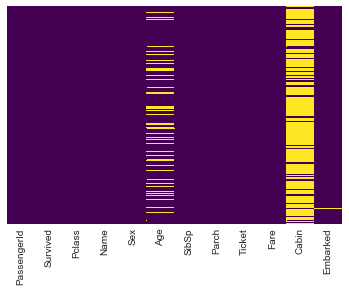

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

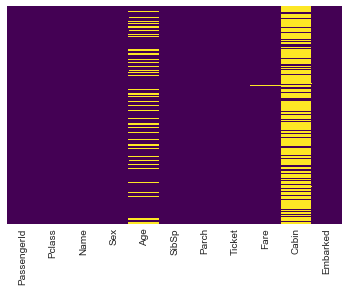

In [7]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Train data - Cabin column will be dropped. We will impute for age data and drop the row with the missing Embarked value.

Test data - Cabin column will be dropped. We will impute for age data and drop the row with the missing Fare value.

### Cleaning the train data:

In [9]:
train.drop('Cabin',axis=1,inplace=True)

Determining the values to impute for age, we will subdivide the data in to Pclass and then once more by sex to try and obtain accurate values for imputation.

In [13]:
train.groupby(['Pclass','Sex']).median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female        447.0       1.0  35.0    0.0    0.0  82.66455
       male          480.5       0.0  40.0    0.0    0.0  41.26250
2      female        439.5       1.0  28.0    0.0    0.0  22.00000
       male          416.5       0.0  30.0    0.0    0.0  13.00000
3      female        376.0       0.5  21.5    0.0    0.0  12.47500
       male          466.0       0.0  25.0    0.0    0.0   7.92500

In [95]:
age_imputor = train.groupby(['Pclass','Sex']).median()

In [92]:
def impute_age(cols):
    
    Pclass = cols[0]
    Sex = cols[1]
    Age = cols[2]    
    
    if pd.isnull(Age):     
        return age_imputor.loc[(Pclass,Sex),'Age']
    else:
        return Age

In [16]:
train['Age'] = train[['Pclass','Sex','Age']].apply(impute_age,axis=1)

In [18]:
train.dropna(inplace=True)

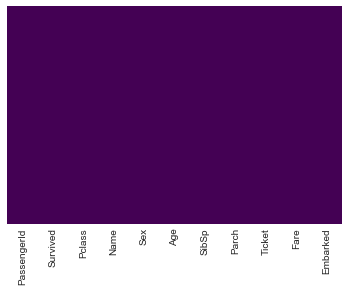

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Cleaning the test data:

In [293]:
test.drop('Cabin',axis=1,inplace=True)

In [294]:
test.groupby(['Pclass','Sex']).median()

PassengerId   Age  SibSp  Parch      Fare
Pclass Sex                                              
1      female       1088.0  41.0    0.0    0.0  79.02500
       male         1094.0  42.0    0.0    0.0  51.86250
2      female       1122.0  24.0    0.0    0.0  26.00000
       male         1122.0  28.0    0.0    0.0  13.00000
3      female       1070.5  22.0    0.0    0.0   8.08125
       male         1102.5  24.0    0.0    0.0   7.89580

In [295]:
age_imputor = test.groupby(['Pclass','Sex']).median()

In [296]:
test['Age'] = test[['Pclass','Sex','Age']].apply(impute_age_test,axis=1)

In [297]:
test.dropna(inplace=True)

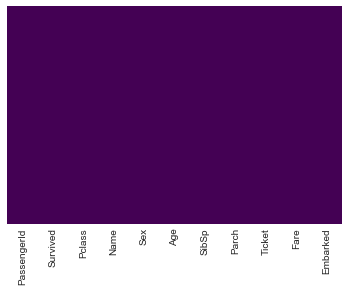

In [97]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Ticket will be dropped as it does not provide any useful information for analysis

In [298]:
test.drop('Ticket',axis=1,inplace=True)

In [102]:
train.drop('Ticket',axis=1,inplace=True)

## Step 2: Processing our qualititative features

### Processing Name column

#### Working through the training data:

In [120]:
def title_selector(title):
    return title.split(',')[1].split(' ')[1]

In [122]:
train['Name'] = train['Name'].apply(lambda x: title_selector(x))

In [123]:
train['Name'].head()

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Name, dtype: object

#### Working through the test data:

In [299]:
test['Name'] = test['Name'].apply(lambda x: title_selector(x))

In [300]:
test['Name'].head()

0     Mr.
1    Mrs.
2     Mr.
3     Mr.
4    Mrs.
Name: Name, dtype: object

### Creating dummy variables

#### Working through the training data:

In [127]:
title = pd.get_dummies(train['Name'],drop_first=True)

In [128]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [129]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [130]:
train = pd.concat([train,title,sex,embark],axis=1)

In [290]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Col.,Don.,Dona.,Dr.,...,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the,male,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [144]:
train.drop(['PassengerId','Sex','Embarked'],axis=1,inplace=True)

In [153]:
train.drop('Name',axis=1,inplace=True)

#### Working through the test data:

In [301]:
title = pd.get_dummies(test['Name'],drop_first=True)

In [302]:
sex = pd.get_dummies(test['Sex'],drop_first=True)

In [303]:
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [304]:
test = pd.concat([test,title,sex,embark],axis=1)

In [305]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Dona.,Dr.,Master.,Miss.,Mr.,Mrs.,Ms.,Rev.,male,Q,S
0,892,3,Mr.,male,34.5,0,0,7.8292,Q,0,0,0,0,1,0,0,0,1,1,0
1,893,3,Mrs.,female,47.0,1,0,7.0000,S,0,0,0,0,0,1,0,0,0,0,1
2,894,2,Mr.,male,62.0,0,0,9.6875,Q,0,0,0,0,1,0,0,0,1,1,0
3,895,3,Mr.,male,27.0,0,0,8.6625,S,0,0,0,0,1,0,0,0,1,0,1
4,896,3,Mrs.,female,22.0,1,1,12.2875,S,0,0,0,0,0,1,0,0,0,0,1


In [312]:
test.drop(['PassengerId','Name','Sex','Embarked'],axis=1,inplace=True)

#### Making the number of features between the two datasets consistent

In [189]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Col.', 'Don.',
       'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.',
       'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the', 'male', 'Q', 'S'],
      dtype='object')

In [258]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Dona.', 'Dr.', 'Master.',
       'Miss.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'male', 'Q', 'S'],
      dtype='object')

In [199]:
train.insert(loc=8, column='Dona.', value=[0]*889)

In [201]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Col.', 'Don.',
       'Dona.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.',
       'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the', 'male',
       'Q', 'S'],
      dtype='object')

In [324]:
train_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Col.', 'Don.',
       'Dona.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.',
       'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the', 'male',
       'Q', 'S']

In [325]:
a=-1
for i in train_columns:
    a+=1
    if i in test.columns:
        pass
    else:
        test.insert(a,i,[0]*417)

In [326]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Col.', 'Don.', 'Dona.',
       'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.',
       'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the', 'male', 'Q', 'S'],
      dtype='object')

## Step 3: Fitting our model

### Importing the necessary libraries

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Splitting our model data

In [327]:
#Creating out features from out dataset
X = train.drop('Survived',axis=1)
#Creating our response
y = train['Survived']

### Splitting our model data for training and testing

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating our model

In [329]:
logmodel = LogisticRegression()

In [330]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [331]:
predictions = logmodel.predict(X_test)

In [332]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88       163
          1       0.87      0.72      0.79       104

avg / total       0.85      0.85      0.85       267



In [333]:
confusion_matrix(y_test,predictions)

array([[152,  11],
       [ 29,  75]], dtype=int64)

#### Including the titles of our passengers as features has increased the number greatly. Below is a test to see if they actually provide an improvement to the model accuracy.

In [164]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Col.', 'Don.',
       'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.',
       'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the', 'male', 'Q', 'S'],
      dtype='object')

In [165]:
train_no_titles = train.drop(['Col.', 'Don.',
       'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.',
       'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the'],axis=1)

In [166]:
X = train_no_titles.drop('Survived',axis=1)
y = train_no_titles['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



#### They do!

## Step 4: Applying our model

In [334]:
application = logmodel.predict(test)

In [339]:
predicted_survivors = pd.concat([pd.Series(data=application,name='Survived'),test],axis=1)

In [340]:
predicted_survivors.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Col.,Don.,Dona.,Dr.,...,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the,male,Q,S
0,0.0,3.0,34.5,0.0,0.0,7.8292,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,62.0,0.0,0.0,9.6875,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,3.0,27.0,0.0,0.0,8.6625,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Now we'll compare how the predicted values compare to our real data.

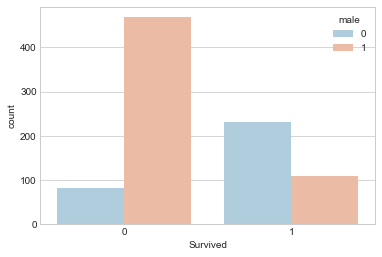

In [342]:
sns.countplot(x='Survived',hue='male',data=train,palette='RdBu_r')

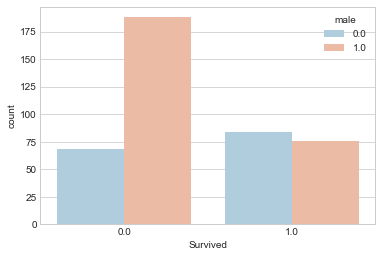

In [343]:
sns.countplot(x='Survived',hue='male',data=predicted_survivors,palette='RdBu_r')

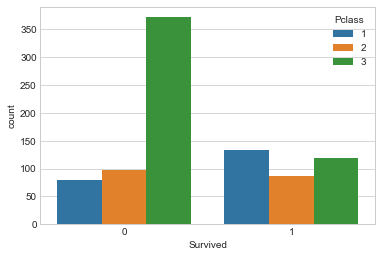

In [344]:
sns.countplot(x='Survived',hue='Pclass',data=train)

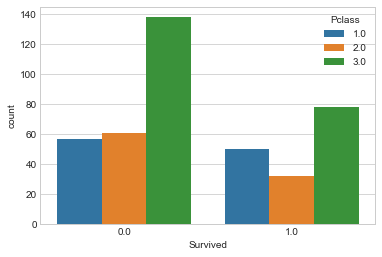

In [345]:
sns.countplot(x='Survived',hue='Pclass',data=predicted_survivors)

Predicted values seem to approximate those where the survived state is known, model seems to be fairly good, accurate one.